In [1]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import plotly.graph_objects as go

### Financial Packages
import yfinance as yf
import pandas_datareader as pdr

### Thecnical Analysis Packages
import ta
import pandas_ta as pdta
import talib

### Functions
from dags import config
from dags.utils import chose_path_to_work, collect_raw_data, plot_boxplots, save_image, formating_raw_columns

### Others
import warnings

##### Config

In [2]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

#### Loading Data

In [5]:
ticker = 'petr4.sa'
df_ticker = pd.read_csv(f'data/raw/{ticker}.csv', encoding='utf8', delimiter=',')

In [6]:
fig = go.Figure(data = go.Ohlc(
    x = df_ticker.date,
    open = df_ticker.open,
    high = df_ticker.high,
    low = df_ticker.low,
    close = df_ticker.close
))
fig.show()

### Describing Data

In [7]:
df_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5645 non-null   object 
 1   open       5645 non-null   float64
 2   high       5645 non-null   float64
 3   low        5645 non-null   float64
 4   close      5645 non-null   float64
 5   adj_close  5645 non-null   float64
 6   volume     5645 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 308.8+ KB


In [8]:
print(f"{ticker}:\n{df_ticker.shape[0]} rows\n{df_ticker.shape[1]} columns")

petr4.sa:
5645 rows
7 columns


In [9]:
list_columns = (df_ticker.columns).tolist()
print(f'Columns: {list_columns}')

Columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


**NOTES**

**Legenda das Colunas:**
- Date: Data do registro
- Open: Preço de abertura do dia
- High: Preço máximo atingido no dia
- Low:  Preço mínimo atingido no dia
- Close: Preço de fechamento do dia
- Adj Close: Preço de fechamento ajustado
- Volume: Volume de ações negociadas

###  Exploring Data

In [10]:
### Ticker Measures
df_ticker.describe()

,open,high,low,close,adj_close,volume
count,5645.00,5645.00,5645.00,5645.00,5645.00,5645.00
mean,18.77,19.04,18.47,18.74,10.64,570528457.96
std,9.55,9.70,9.38,9.52,6.03,3978726753.76
min,4.20,4.27,4.12,4.20,1.96,0.00
25%,9.99,10.21,9.77,10.01,5.20,20993900.00
50%,18.96,19.22,18.61,18.94,10.52,33360000.00
75%,25.77,26.12,25.40,25.70,14.61,53853000.00
max,67.50,67.50,51.95,52.51,32.48,73564160000.00


In [11]:
### Checking for missing data
df_ticker.isna().any()

date         False
open         False
high         False
low          False
close        False
adj_close    False
volume       False
dtype: bool

In [12]:
### Checking for duplicated data
df_ticker.duplicated().any()

False

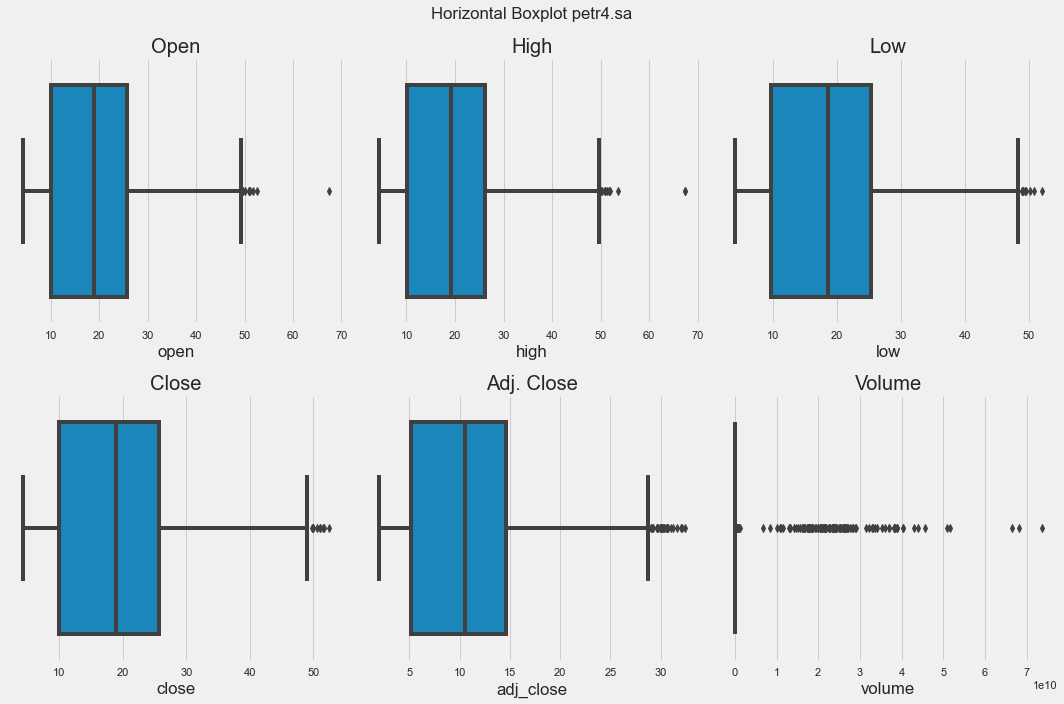

In [13]:
boxplots = plot_boxplots(df_ticker, ticker)

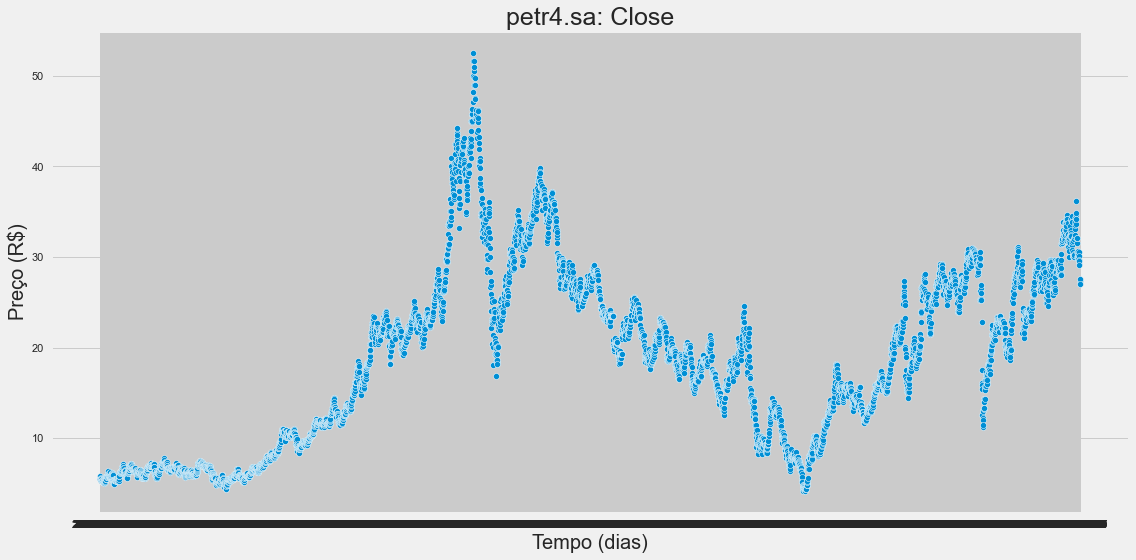

In [14]:
img_ticker_distr_close = sns.scatterplot(data = df_ticker, x = 'date', y = 'close')
plt.title(f'{ticker}: Close', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

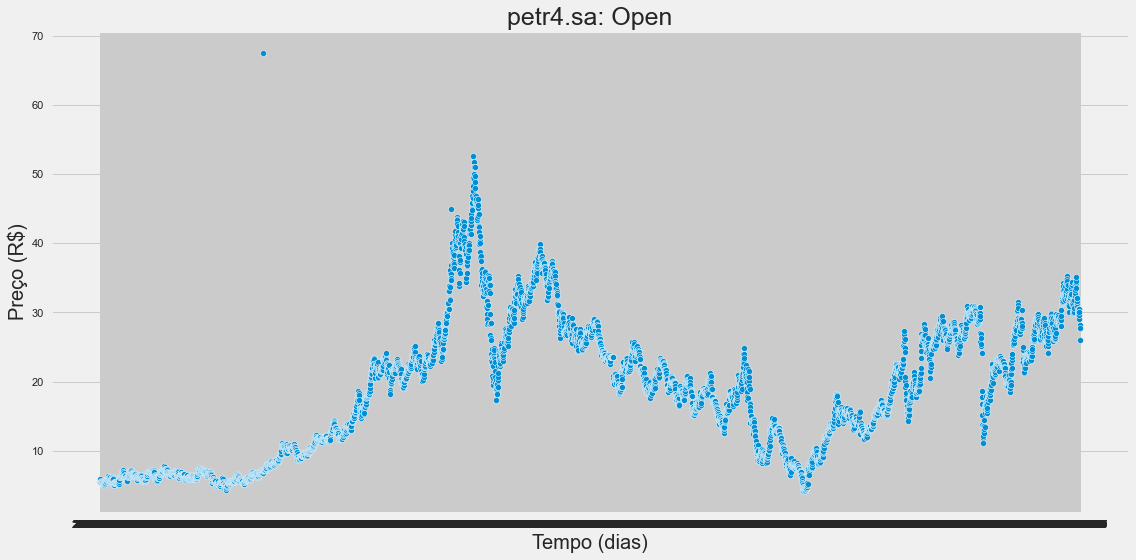

In [15]:
img_ticker_distr_open = sns.scatterplot(data = df_ticker, x = 'date', y = 'open')
plt.title(f'{ticker}: Open', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

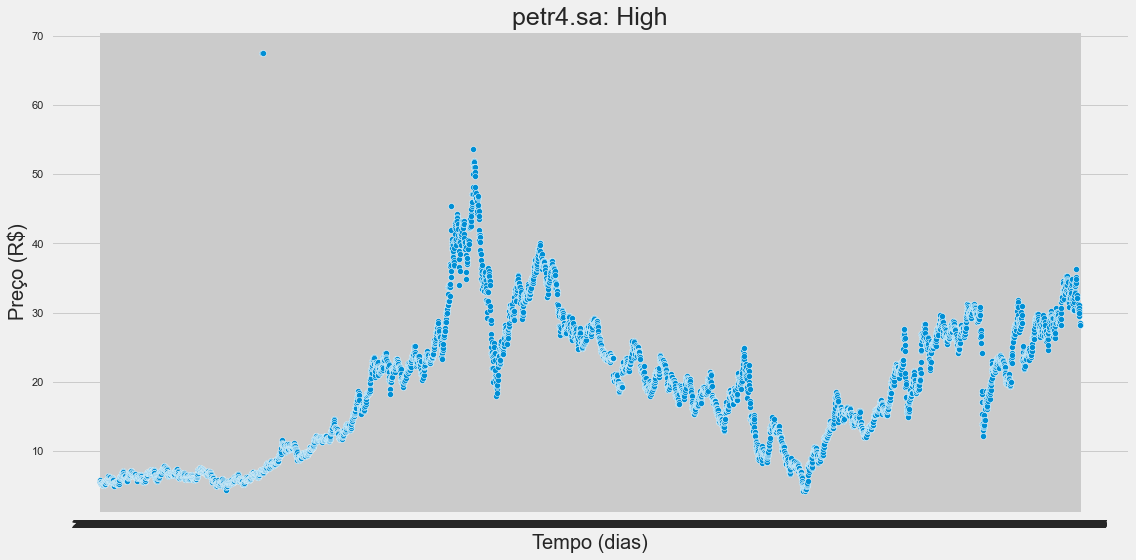

In [17]:
img_ticker_distr_high = sns.scatterplot(data = df_ticker, x = 'date', y = 'high')
plt.title(f'{ticker}: High', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

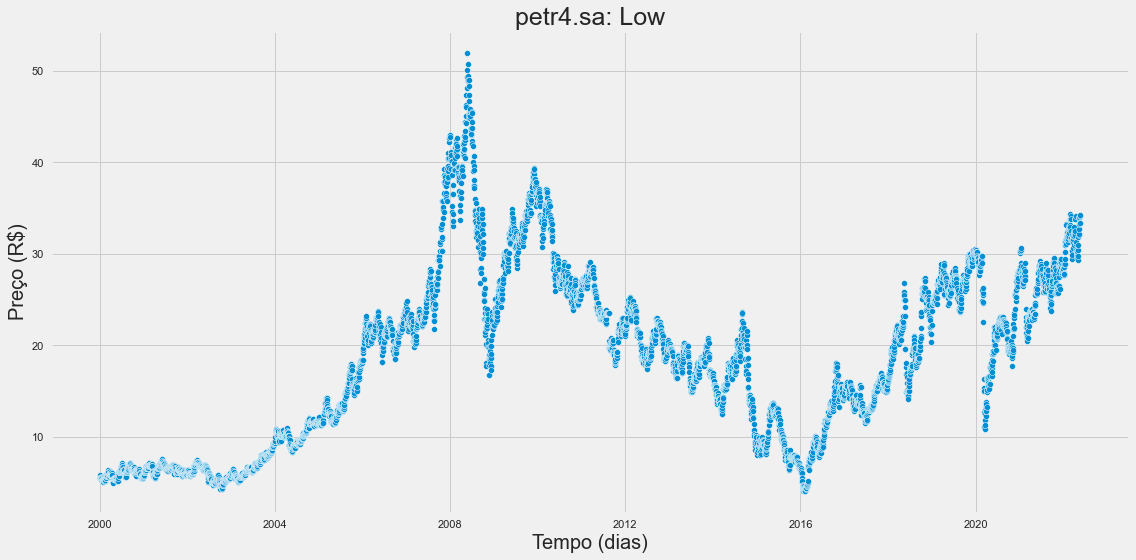

In [ ]:
img_ticker_distr_low = sns.scatterplot(data = df_ticker, x = 'date', y = 'low')
plt.title(f'{ticker}: Low', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

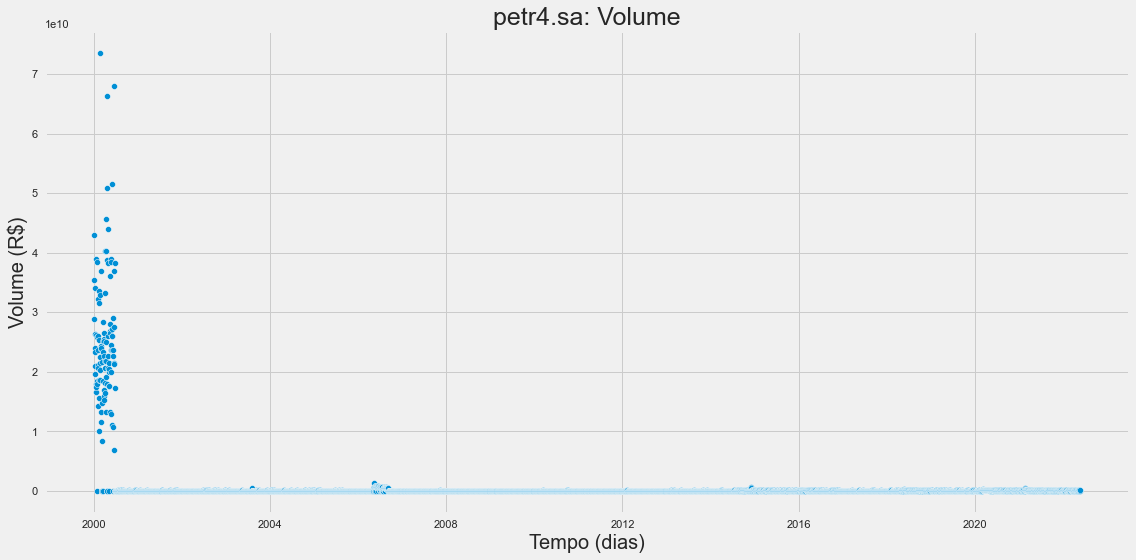

In [ ]:
img_ticker_distr_volume = sns.scatterplot(data = df_ticker, x = 'date', y = 'volume')
plt.title(f'{ticker}: Volume', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Volume (R$)", fontsize=20)
plt.grid(True)

### Saving Images

In [ ]:
save_image(img=boxplots, name=f'img_{ticker}_boxplots')
save_image(img=img_ticker_distr_close, name=f'img_{ticker}_close')
save_image(img=img_ticker_distr_open, name=f'img_{ticker}_open')
save_image(img=img_ticker_distr_high, name=f'img_{ticker}_high')
save_image(img=img_ticker_distr_low, name=f'img_{ticker}_low')
save_image(img=img_ticker_distr_volume, name=f'img_{ticker}_volume')

Image img_petr4.sa_boxplots saved.
Image img_petr4.sa_close saved.
Image img_petr4.sa_open saved.
Image img_petr4.sa_high saved.
Image img_petr4.sa_low saved.
Image img_petr4.sa_volume saved.
